import pandas as pd import seaborn as sns import matplotlib.pyplot as
plt import numpy as np sns.set_style('darkgrid') sns.set(font_scale=1.3)

df=pd.read_csv("/content/drive/MyDrive/IBM/Assignment - 2

/Churn_Modelling.csv") df.head()

RowNumberCustomerId Surname CreditScore Geography Gender Age

\\

1.  1 15634602 Hargrave 619 France Female 42

2.  2 15647311 Hill 608 Spain Female 41

3.  3 15619304 Onio 502 France Female 42

4.  4 15701354 Boni 699 France Female 39

5.  5 15737888 Mitchell 850 Spain Female 43

Tenure Balance NumOfProductsHasCrCardIsActiveMember \\ 0 2 0.00 1 1 1

1.  1 83807.86 1 0 1

2.  8 159660.80 3 1 0

3.  1 0.00 2 0 0

4.  2 125510.82 1 1 1

EstimatedSalary Exited 0 101348.88 1

1.  112542.58 0

2.  113931.57 1

3.  93826.63 0 4 79084.10 0

df.drop(\["RowNumber","CustomerId","Surname"\],axis=1,inplace=True)
df.info()

\<class 'pandas.core.frame.DataFrame'\>RangeIndex: 10000 entries, 0 to
9999

Data columns (total 11 columns):

\# Column Non-Null Count Dtype

--- ------ -------------- -----

0 CreditScore 10000 non-null int64 1 Geography 10000 non-null object 2
Gender 10000 non-null object 3 Age 10000 non-null int64

4 Tenure 10000 non-null int64 5 Balance 10000 non-null float64 6
NumOfProducts 10000 non-null int64

7 HasCrCard 10000 non-null int64 8 IsActiveMember 10000 non-null int64 9
EstimatedSalary 10000 non-null float64 10 Exited 10000 non-null int64
dtypes: float64(2), int64(7), object(2) memory usage: 859.5+ KB

*\#Perform Univariate Analysis* plt.figure(figsize=(8,8))
sns.countplot(x='Tenure',data=df)

plt.xlabel('0:Customers with Bank, 1: exited from bank')
plt.ylabel('No.of.Customers') plt.title("Bank Customers viz") plt.show()

> 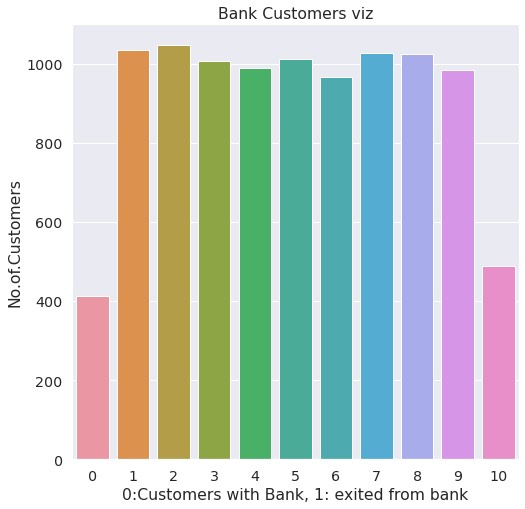

*\#Perform Univariate Analysis* plt.figure(figsize=(8,8))
sns.kdeplot(x=df\['Balance'\])

\<matplotlib.axes.\_subplots.AxesSubplot at 0x7fa0c03906d0\>

> 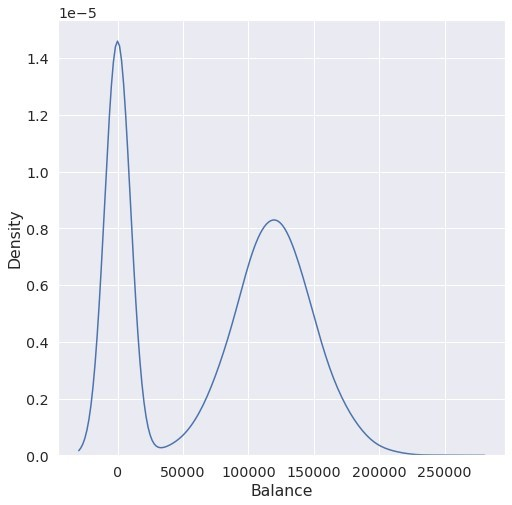

*\#Perform Bivariate Analysis* plt.scatter(df.Age,df.Balance)

\<matplotlib.collections.PathCollection at 0x7fa0d35a7dd0\>

> 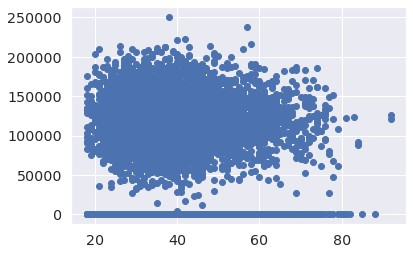

*\#Perform Bivariate Analysis* df.corr()

CreditScore Gender Age Tenure

Balance \\

CreditScore1.000000 0.007888 -0.003965 0.000842 0.006268 Gender 0.007888
1.000000 0.022812 0.003739 0.069408

Age -0.003965 0.022812 1.000000 -0.009997 0.028308 Tenure 0.000842
0.003739 -0.009997 1.000000 -0.012254

Balance 0.006268 0.069408 0.028308 -0.012254 1.000000 NumOfProducts
0.012238 0.003972 -0.030680 0.013444 -0.304180

HasCrCard -0.005458 -0.008523 -0.011721 0.022583 -0.014858

IsActiveMember0.025651 0.006724 0.085472 -0.028362 -0.010084

EstimatedSalary -0.001384 -0.001369 -0.007201 0.007784 0.012797

Exited -0.027094 0.035943 0.285323 -0.014001 0.118533

NumOfProductsHasCrCardIsActiveMemberEstimatedSalary \\

CreditScore0.012238 -0.005458 0.025651 -

0.001384

Gender 0.003972 -0.008523 0.006724 -

0.001369

Age -0.030680 -0.011721 0.085472 -

0.007201

Tenure 0.013444 0.022583 -0.028362

0.007784

Balance -0.304180 -0.014858 -0.010084

0.012797

NumOfProducts 1.000000 0.003183 0.009612

0.014204

HasCrCard 0.003183 1.000000 -0.011866 -

0.009933

IsActiveMember0.009612 -0.011866 1.000000 -

0.011421

EstimatedSalary0.014204 -0.009933 -0.011421

1.000000

Exited -0.047820 -0.007138 -0.156128

0.012097

Exited

CreditScore -0.027094 Gender 0.035943 Age 0.285323 Tenure -0.014001
Balance 0.118533 NumOfProducts -0.047820

HasCrCard -0.007138

IsActiveMember -0.156128 EstimatedSalary 0.012097 Exited 1.000000

*\#Perform Bivariate Analysis* import statsmodels.api as sm

*\#define response variable* y =df\['CreditScore'\]

*\#define explanatory variable* x =df\[\['EstimatedSalary'\]\]

*\#add constant to predictor variables* x =sm.add_constant(x)

*\#fit linear regression model* model=sm.OLS(y, x).fit()

*\#view model summary* print(model.summary()) OLS Regression Results

======================================================================

========

Dep. Variable: CreditScore R-squared: 0.000

Model: OLS Adj. R-squared:

-0.000

Method: Least Squares F-statistic:

0.01916

Date: Sat, 24 Sep 2022 Prob (F-statistic): 0.890

Time: 05:06:19 Log-Likelihood:

-59900.

No. Observations: 10000 AIC:

1.198e+05

Df Residuals: 9998 BIC:

1.198e+05

Df Model: 1

Covariance Type: nonrobust

======================================================================

=============

coef std err t P\>\|t\|

\[0.025 0.975\]

----------------------------------------------------------------------

-------------

const 650.7617 1.940 335.407 0.000

646.958 654.565

EstimatedSalary -2.326e-06 1.68e-05 -0.138 0.890 -3.53e05 3.06e-05

======================================================================

========

Omnibus: 132.939 Durbin-Watson:

2.014

Prob(Omnibus): 0.000 Jarque-Bera (JB):

84.242

Skew: -0.072 Prob(JB):

5.10e-19

Kurtosis: 2.574 Cond. No.

2.32e+05

======================================================================
========

Notes:

1.  Standard Errors assume that the covariance matrix of the errors
    iscorrectly specified.

2.  The condition number is large, 2.32e+05. This might indicate that
    there are strong multicollinearity or other numerical problems.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ tsatools.py:142:
FutureWarning: In a future version of pandas all arguments of concat
except for the argument 'objs' will be keywordonly x =
pd.concat(x\[::order\], 1)

*\#Perform Multivariate Analysis* plt.figure(figsize=(4,4))

sns.pairplot(data=df\[\["Balance","CreditScore","EstimatedSalary","NumOf
Products","Tenure","Exited"\]\],hue="Exited")

\<seaborn.axisgrid.PairGrid at 0x7fa0b00a1b10\>

\<Figure size 288x288 with 0 Axes\>

> 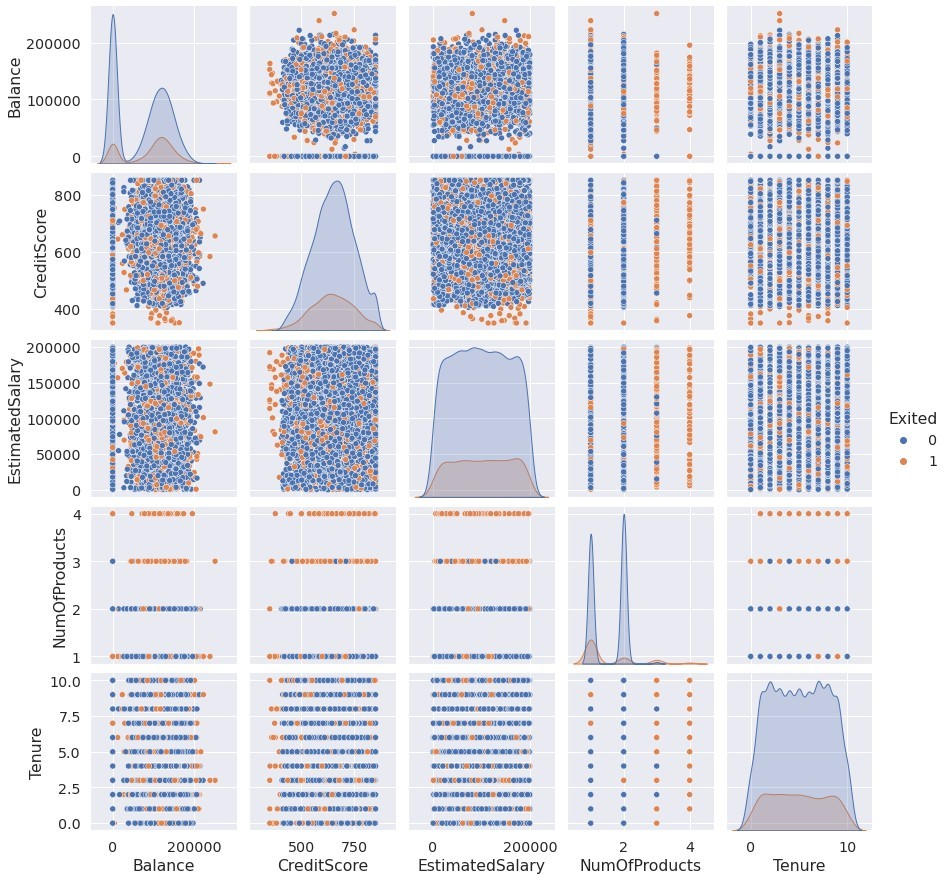

*\#Perform Descriptive Statistics* df=pd.DataFrame(df) print(df.sum())

CreditScore 6505288 Geography
FranceSpainFranceFranceSpainSpainFranceGermany...

Gender FemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMa... Age 389218
Tenure 50128 Balance 764858892.88 NumOfProducts 15302

HasCrCard 7055

IsActiveMember 5151 EstimatedSalary 1000902398.81 Exited 2037 dtype:
object

*\#Perform Descriptive Statistics* print("----Sum Value-----")
print(df.sum(1))

print("----------------------------------") print("-----Product
Value-----") print(df.prod())

print("----------------------------------")

----Sum Value-----

1.  102015.88

2.  197002.44

3.  274149.37

4.  94567.63

5.  205492.92 ... 9995 97088.64

<!-- -->

1.  159633.38

2.  42840.58

3.  168784.83

4.  169159.57

Length: 10000, dtype: float64

----------------------------------

-----Product Value-----

CreditScore 0.0

Age 0.0 Tenure 0.0 Balance 0.0 NumOfProducts 0.0

HasCrCard 0.0

IsActiveMember 0.0 EstimatedSalary inf Exited 0.0 dtype: float64

---------------------------------/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3:

FutureWarning: Dropping of nuisance columns in DataFrame reductions
(with 'numeric_only=None') is deprecated; in a future version this will
raise TypeError. Select only valid columns before calling the reduction.

This is separate from the ipykernel package so we can avoid doing
imports until

/usr/local/lib/python3.7/dist-packages/numpy/core/\_methods.py:52:
RuntimeWarning: overflow encountered in reduce

return umr_prod(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6:

FutureWarning: Dropping of nuisance columns in DataFrame reductions
(with 'numeric_only=None') is deprecated; in a future version this will
raise TypeError. Select only valid columns before calling the reduction.

*\#Perform Descriptive Statistics* print("----------Mean
Value-----------") print(df.mean())

print("-------------------------------") print("----------Median
Value---------") print(df.median())

print("-------------------------------") print("----------Mode
Value------------") print(df.mode())

print("-------------------------------")

----------Mean Value-----------

CreditScore 650.528800

Age 38.921800 Tenure 5.012800 Balance 76485.889288 NumOfProducts
1.530200

HasCrCard 0.705500

IsActiveMember 0.515100 EstimatedSalary 100090.239881 Exited 0.203700
dtype: float64

-------------------------------

----------Median Value---------

CreditScore 652.000

Age 37.000 Tenure 5.000 Balance 97198.540 NumOfProducts 1.000

HasCrCard 1.000

IsActiveMember 1.000 EstimatedSalary 100193.915 Exited 0.000 dtype:
float64

-------------------------------

----------Mode Value------------

CreditScore Geography Gender Age Tenure Balance

NumOfProducts \\

0 850 France Male 37 2 0.0 1

HasCrCardIsActiveMemberEstimatedSalary Exited 0 1 1 24924.92 0

-------------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3:

FutureWarning: Dropping of nuisance columns in DataFrame reductions
(with 'numeric_only=None') is deprecated; in a future version this will
raise TypeError. Select only valid columns before calling the reduction.

This is separate from the ipykernel package so we can avoid doing
imports until

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6:

FutureWarning: Dropping of nuisance columns in DataFrame reductions
(with 'numeric_only=None') is deprecated; in a future version this will
raise TypeError. Select only valid columns before calling the reduction.

*\#Handling with missing Values* df.isnull()*\#Checking values are null*

CreditScore Geography Gender Age Tenure Balance

NumOfProducts \\

1.  False FalseFalseFalseFalseFalse

False

1.  False FalseFalseFalseFalseFalse

False

1.  False FalseFalseFalseFalseFalse

False

1.  False FalseFalseFalseFalseFalse

False

1.  False FalseFalseFalseFalseFalse

False

... ... ... ... ... ... ... ...

1.  False FalseFalseFalseFalseFalse

False

1.  False FalseFalseFalseFalseFalse

False

1.  False FalseFalseFalseFalseFalse

False

1.  False FalseFalseFalseFalseFalseFalse

2.  False FalseFalseFalseFalseFalseFalse

HasCrCardIsActiveMemberEstimatedSalary Exited

1.  False FalseFalseFalse

2.  False FalseFalseFalse

3.  False FalseFalseFalse

4.  False FalseFalseFalse

5.  False FalseFalseFalse

... ... ... ... ...

1.  False FalseFalseFalse

2.  False FalseFalseFalse

3.  False FalseFalseFalse

4.  False FalseFalseFalse

5.  False FalseFalseFalse

\[10000 rows x 11 columns\]

*\#Handling with missing Values* df.notnull()*\#Checking values are not
null*

CreditScore Geography Gender Age Tenure Balance

NumOfProducts \\

1.  True TrueTrueTrueTrueTrue

True

1.  True TrueTrueTrueTrueTrue

True

1.  True TrueTrueTrueTrueTrue

True

1.  True TrueTrueTrueTrueTrue

True

1.  True TrueTrueTrueTrueTrue

True

... ... ... ... ... ... ... ...

1.  True TrueTrueTrueTrueTrue

True

1.  True TrueTrueTrueTrueTrue

True

1.  True TrueTrueTrueTrueTrue

True

1.  True TrueTrueTrueTrueTrue

True

1.  True TrueTrueTrueTrueTrueTrue

HasCrCardIsActiveMemberEstimatedSalary Exited

1.  True TrueTrueTrue

2.  True TrueTrueTrue

3.  True TrueTrueTrue

4.  True TrueTrueTrue

5.  True TrueTrueTrue ... ... ... ... ...

<!-- -->

1.  True TrueTrueTrue

2.  True TrueTrueTrue

3.  True TrueTrueTrue

4.  True TrueTrueTrue

5.  True TrueTrueTrue

\[10000 rows x 11 columns\]

*\#Find outliers & replace the outliers* sns.boxplot(df\['Balance'\])

/usr/local/lib/python3.7/dist-packages/seaborn/\_decorators.py:43:
FutureWarning: Pass the following variable as a keyword arg: x. From
version 0.12, the only valid positional argument will be \`data\`, and
passing other arguments without an explicit keyword will result in an
error or misinterpretation. FutureWarning

\<matplotlib.axes.\_subplots.AxesSubplot at 0x7fa0af6dcf90\>

> 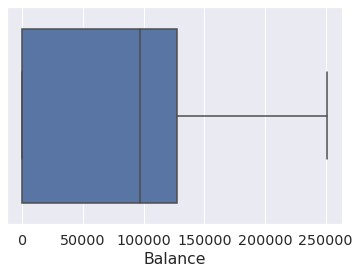

*\#Find outliers & replace the outliers*
print(np.where(df\['Balance'\]\>100000))

(array(\[ 2, 4, 5, ..., 9987, 9993, 9999\]),)

*\#Find outliers & replace the outliers* from scipy import stats import
numpy as np

z =np.abs(stats.zscore(df\["EstimatedSalary"\])) print(z)

1.  0.021886

2.  0.216534

3.  0.240687

4.  0.108918

5.  0.365276 ... 9995 0.066419

<!-- -->

1.  0.027988

2.  1.008643

3.  0.125231

4.  1.076370

Name: EstimatedSalary, Length: 10000, dtype: float64

*\#Check for categorical columns & performs encoding* from
sklearn.preprocessing import LabelEncoderdf\['Gender'\].unique()

array(\['Female', 'Male'\], dtype=object)

*\#Check for categorical columns & performs encoding*
df\['Gender'\].value_counts()

Male 5457 Female 4543

Name: Gender, dtype: int64

*\#Check for categorical columns & performs encoding*
encoding=LabelEncoder()

df\["Gender"\]=encoding.fit_transform(df.iloc\[:,1\].values) df

CreditScoreGeography Gender Age Tenure Balance

NumOfProducts \\

1.  619 France 0 42 2 0.00

1

1.  608 Spain 2 41 1 83807.86

1

1.  502 France 0 42 8 159660.80

3

1.  699 France 0 39 1 0.00

2

1.  850 Spain 2 43 2 125510.82

1

... ... ... ... ... ... ... ...

1.  771 France 0 39 5 0.00

2

1.  516 France 0 35 10 57369.61

1

1.  709 France 0 36 7 0.00

1

1.  772 Germany 1 42 3 75075.31

2

1.  792 France 0 28 4 130142.79 1

HasCrCardIsActiveMemberEstimatedSalary Exited

1.  1 1 101348.88 1

2.  0 1 112542.58 0

3.  1 0 113931.57 1

4.  0 0 93826.63 0

5.  1 1 79084.10 0 ... ... ... ... ...

<!-- -->

1.  1 0 96270.64 0

2.  1 1 101699.77 0

3.  0 1 42085.58 1

4.  1 0 92888.52 1

5.  1 0 38190.78 0

\[10000 rows x 11 columns\]

*\#Check for categorical columns & performs encoding*

*\#Split the data into Dependent & Independent Variables*
print("----------Dependent Variables----------")

X=df.iloc\[:,1:4\] print(X)

print("---------------------------------------")
print("---------Independent Variables---------")

Y=df.iloc\[:,4\] print(Y)

print("---------------------------------------")

----------Dependent Variables-----------

Age Tenure Balance 0 42 2 0.00

1.  41 1 83807.86

2.  42 8 159660.80

3.  39 1 0.00

4.  43 2 125510.82 ... ... ... ... 9995 39 5 0.00

<!-- -->

1.  35 10 57369.61

2.  36 7 0.00

3.  42 3 75075.31

4.  28 4 130142.79

\[10000 rows x 3 columns\]

---------------------------------------

---------Independent Variables---------

1.  1

2.  1

3.  3

4.  2

5.  1 ..

<!-- -->

1.  2

2.  1

3.  1

4.  2

5.  1

Name: NumOfProducts, Length: 10000, dtype: int64

---------------------------------------

*\#Scale the independent Variables*

from sklearn.preprocessing import StandardScaler object=StandardScaler()
*\# standardization* scale =object.fit_transform(df) print(scale)

\[\[-0.32622142 0.29351742 -1.04175968 ... 0.97024255 0.02188649

1.97716468\]

\[-0.44003595 0.19816383 -1.38753759 ... 0.97024255 0.21653375

-0.50577476\]

\[-1.53679418 0.29351742 1.03290776 ... -1.03067011 0.2406869
1.97716468\] ...

\[ 0.60498839 -0.27860412 0.68712986 ... 0.97024255 -1.00864308

1.97716468\]

\[ 1.25683526 0.29351742 -0.69598177 ... -1.03067011 -0.12523071

1.97716468\]

\[ 1.46377078 -1.04143285 -0.35020386 ... -1.03067011 -1.07636976
-0.50577476\]\]

*\#Split the data into training & testing* from sklearn.model_selection
import train_test_split

*\#Split the data into training & testing*

x_train, x_test, y_train, y_test=train_test_split(x, y,
test_size=4,random_state=4) x_train

const EstimatedSalary 2558 1.0 137903.54

7642 1.0 121765.00

8912 1.0 109470.34

3319 1.0 2923.61

6852 1.0 7312.25 ... ... ... 456 1.0 7666.73

6017 1.0 9085.00

709 1.0 147794.63

8366 1.0 102515.42

1146 1.0 54776.64

\[9996 rows x 2 columns\]

*\#Split the data into training & testing* x_test

const EstimatedSalary 1603 1.0 23305.85

8713 1.0 41248.80

4561 1.0 143317.42

6600 1.0 174123.16

*\#Split the data into training & testing* y_train

2558 727

7642 811

8912 623

3319 430

6852 600 ... 456 733

6017 487

709 686

8366 637

1146 614

Name: CreditScore, Length: 9996, dtype: int64

*\#Split the data into training & testing* y_test

1603 576

8713 786

4561 562

6600 505

Name: CreditScore, dtype: int64